In [110]:
import pandas as pd #import pandas
import numpy as numpy #import numpy
from sklearn.utils import shuffle # to shuffle the data 
import random # import random
import sklearn # import sklearn
import nltk # import nltk
from nltk.corpus import stopwords #import stop words
import re # import regular expression
from nltk.tokenize import word_tokenize # import word_tokenize
import matplotlib
import matplotlib.pyplot as plt #import matplotlib.pyplot
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [111]:
df = pd.read_csv("C:/Users/Terminator/Downloads/file/data/train.csv")

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
df.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [114]:
df.sentiment.value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

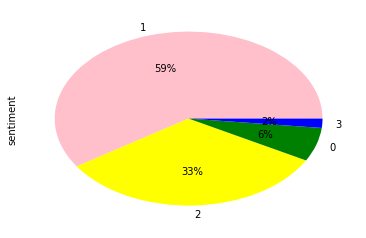

In [115]:
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["pink", "yellow", "green","blue"]) 

In [116]:
df['pre_clean_len'] = [len(str(t)) for t in df.tweet]
# add new column pre_clean_len to dataframe which is length of each tweet

In [117]:
df.head()

,tweet_id,tweet,sentiment,pre_clean_len
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77


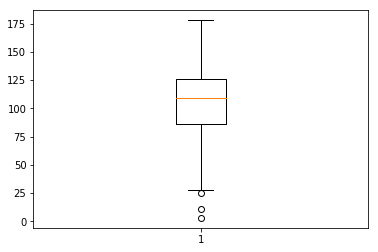

In [118]:
plt.boxplot(df.pre_clean_len) # plot pre_clean_len column
plt.show()

In [119]:
df[df.pre_clean_len > 140].head(10)  
# check for any tweets greater than 140 characters

,tweet_id,tweet,sentiment,pre_clean_len
1,1851,Learning ab Google doodles! All doodles should...,1,143
74,1779,"@mention 2 heck w/being sick, #Apple is suppos...",1,141
96,6615,RT @mention RT @mention Tweet this to register...,1,143
98,6669,RT @mention So it appears Apple is opening a p...,1,152
114,5174,RT @mention &quot;Everyone here already has on...,1,155
154,7974,I still use Tweetie for Mac &amp; I'm running ...,2,142
169,6652,RT @mention Server Challenge is a huge hit at ...,1,142
200,6427,RT @mention Over 100 in line at Apple pop-up s...,1,150
232,5169,RT @mention &quot;Apple likes it if you pay th...,1,143
236,4509,#sxsw: #indieauthors: Sanders: &quot;One autho...,1,144


In [120]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

# remove @ mentions fron tweets
pat1 = r'@[A-Za-z0-9_]+'        

# remove URL's from tweets
pat2 = r'https?://[^ ]+'        

#addition of pat1 and pat2
combined_pat = r'|'.join((pat1, pat2)) 

# remove URL's from tweets
www_pat = r'www.[^ ]+'         

# converting words like isn't to is not
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

# define tweet_cleaner function to clean the tweets
def tweet_cleaner(text):
    # call beautiful object
    soup = BeautifulSoup(text, 'lxml')    
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig codeing
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URL's
    lower_case = stripped.lower()      # converting all into lower case
    
    # converting word's like isn't to is not
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) 
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    
    # Word Punct Tokenize and only consider words whose length is greater than 1
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] 
    return (" ".join(words)).strip() # join the words

In [121]:
clean_tweet_texts = [] # initialize list

for i in range(0,7274):
    clean_tweet_texts.append(tweet_cleaner(str(df['tweet'][i])))
                             

In [122]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Terminator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet_texts:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) 
    #tokenize word in clean_tweet_texts and append it to word_tokens list

In [124]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Terminator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [125]:
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1

In [126]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df1.append(a) # append a to clean_df1

In [127]:
clean_df = pd.DataFrame(clean_df1,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
clean_df['target'] = df.sentiment # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
#clean_df

In [128]:
clean_df['clean_len'] = [len(t) for t in clean_df.text] # Again make a new coloumn in the dataframe and name it as clean_len which will store thw number of words in the tweet

In [129]:
clean_df[clean_df.clean_len > 140].head(10) # agin check id any tweet is more than 140 characters

,text,target,clean_len


In [130]:
X = clean_df.text # get all the text in x variable
y = clean_df.target # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(7274,)
(7274,)


In [131]:
clean_df.head()

,text,target,clean_len
0,sxswnui sxsw apple defining language of touch ...,1,85
1,learning ab google doodle all doodle should be...,1,127
2,one of the most in your face ex of stealing th...,2,102
3,this iphone sxsw app would pretty awesome if i...,0,117
4,line outside the apple store in austin waiting...,1,73


In [132]:
from sklearn.cross_validation import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0) # split the data into traing and testing set where ratio is 80:20


# X_train is the tweets of training data, X_test is the testing tweets which we have to predict, y_train is the sentiments of tweets in the traing data and y_test is the sentiments of the tweets  which we will use to measure the accuracy of the model

In [133]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) # Get Tf-idf object and save it as vect. We can select features from here we just have simply change 
                                                                                     #the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [134]:
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train) # transform our training data tweets

In [135]:
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

In [136]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [137]:
nb.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [138]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies_nb = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies_nb.mean() # measure the mean accuray of 10 fold cross validation

0.5999319820555179

In [139]:
y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets

In [140]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) # measure the accuracy of our model on the testing data

0.6027491408934708

In [141]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[  0,  92,   0,   0],
       [  0, 871,   0,   0],
       [  0, 467,   6,   0],
       [  0,  19,   0,   0]], dtype=int64)

In [142]:
from sklearn.metrics import f1_score
f1_score_nb = f1_score(y_test, y_pred_nb,average='micro')
f1_score_nb

0.6027491408934708

In [143]:
from sklearn.linear_model import LogisticRegression # import Logistic Regression model from sklearn.linear_model
logisticRegr = LogisticRegression(C = 1.1) # get object of logistic regression model with cost parameter = 1.1

In [144]:
logisticRegr.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the logistic regression model

LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logisticRegr, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracy_log=accuracies.mean() # measure the mean accuray of 10 fold cross validation
accuracy_log

0.6456445581079582

In [146]:
y_pred_lg = logisticRegr.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [147]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data

0.6577319587628866

In [148]:
from sklearn.metrics import f1_score
f1_score_lg = f1_score(y_test, y_pred_lg,average='micro')
f1_score_lg

0.6577319587628866

In [149]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_lg) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[  3,  71,  18,   0],
       [  1, 786,  84,   0],
       [  0, 305, 168,   0],
       [  1,  12,   6,   0]], dtype=int64)

In [150]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [151]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [152]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.6769291455762128

In [153]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [154]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_svm)  # measure the accuracy of our model on the testing data

0.6769759450171822

In [155]:
from sklearn.metrics import f1_score
f1_score_svm = f1_score(y_test, y_pred_svm,average='micro')
f1_score_svm

0.6769759450171822

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rfc = RandomForestClassifier(random_state=0)

In [158]:
rfc.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the random forest model model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [159]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = rfc, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.6408320869442503

In [160]:
y_pred_rfc = rfc.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [161]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_rfc)  # measure the accuracy of our model on the testing data

0.6274914089347079

In [162]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_rfc)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[ 13,  63,  16,   0],
       [  6, 773,  90,   2],
       [  0, 344, 127,   2],
       [  1,  16,   2,   0]], dtype=int64)

In [163]:
from sklearn.metrics import f1_score
f1_score_rfc = f1_score(y_test, y_pred_rfc,average='micro')
f1_score_rfc

0.6274914089347079

In [164]:
# XGBoost

In [165]:
!pip install xgboost

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
dt_clf=DecisionTreeClassifier(max_depth=2,random_state=0)

In [168]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [169]:
xgb_clf = XGBClassifier(base_estimator=dt_clf, random_state=0)

In [170]:
xgb_clf.fit(X_train_dtm,y_train)
xgb_score = xgb_clf.score(X_test_dtm,y_test)
print("XGBoost Score: ",xgb_score)

XGBoost Score:  0.6426116838487973


C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [171]:
y_pred_xgb = xgb_clf.predict(X_test_dtm)

C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [172]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_xgb)  # measure the accuracy of our model on the testing data

0.6426116838487973

In [173]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_xgb)# plot the confusion matrix between our predicted sentiments and the origina

array([[  6,  79,   7,   0],
       [  1, 835,  35,   0],
       [  0, 379,  94,   0],
       [  0,  15,   4,   0]], dtype=int64)

In [174]:
from sklearn.metrics import f1_score
f1_score_xgb = f1_score(y_test, y_pred_xgb,average='micro')
f1_score_xgb

0.6426116838487973

In [175]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [176]:
xgb1.fit(X_train_dtm,y_train)
xgb1_score = xgb1.score(X_test_dtm,y_test)
print("XGBoost 1 Score: ",xgb1_score)

XGBoost 1 Score:  0.6563573883161512


C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [177]:
from sklearn.ensemble import AdaBoostClassifier

In [178]:
ada_clf = AdaBoostClassifier(base_estimator=dt_clf,random_state=0)
ada_clf.fit(X_train_dtm,y_train)
ada_score = ada_clf.score(X_test_dtm,y_test)
print("Ada boost Score: ",ada_score)

Ada boost Score:  0.5958762886597938


In [181]:
model1 = LogisticRegression(random_state=0)
model2 = DecisionTreeClassifier(random_state=0)
model3 = RandomForestClassifier(random_state=0)
model4 = LinearSVC()
model5 = XGBClassifier()
model6 = AdaBoostClassifier()
Voting_clf = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf',model3), ('sv',model4),('xg',model5),('ad',model6)], voting='hard')
Voting_clf.fit(X_train_dtm,y_train)
score_voting=Voting_clf.score(X_test_dtm,y_test)
print("Voting_clf score: ",score_voting)
y_pred_vote = Voting_clf.predict(X_test_dtm)
confusion_matrix(y_test, y_pred_vote)

Voting_clf score:  0.6556701030927835


C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

array([[ 12,  69,  11,   0],
       [  5, 827,  38,   1],
       [  0, 358, 115,   0],
       [  1,  15,   3,   0]], dtype=int64)

In [ ]:
### TESTING DATA ####

In [182]:
test_csv=pd.read_csv("C:/Users/Terminator/Downloads/file/data/test.csv")

In [204]:
test_csv.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [183]:
test_tweet=test_csv['tweet']

In [185]:
clean_tweet_test = [] # initialize list

for i in range(0,1819):
    clean_tweet_test.append(tweet_cleaner(str(test_csv['tweet'][i])))

In [186]:
word_tokens_test = [] # initialize list for tokens
for word in clean_tweet_test:  # for each word in clean_tweet_texts
    word_tokens_test.append(word_tokenize(word)) 
    #tokenize word in clean_tweet_texts and append

In [187]:
df2 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens_test: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df2.append(b) #append b to list df1

In [188]:
clean_df2 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df2:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and giev it to a
    clean_df2.append(a) # append a to clean_df1

In [190]:
clean_df_test = pd.DataFrame(clean_df2,columns=['tweet']) # convert clean_tweet_texts into dataframe and name it as clean_df

In [191]:
clean_df_test['clean_len'] = [len(t) for t in clean_df_test.tweet] # Again make a new coloumn in the dataframe and name it as clean_len which will store thw 

In [192]:
clean_df_test[clean_df_test.clean_len > 140].head(10) # agin check id any tweet is more than 140 characters

,tweet,clean_len


In [193]:
Test_tweet = clean_df_test.tweet # get all the text in x variabl

In [194]:
clean_df_test.head()

,tweet,clean_len
0,audience what prototyping tool do you use sket...,122
1,at sxsw send your best photo video to link cit...,103
2,and here pic of you winning your ipad unsix sx...,66
3,google marissa mayer mobile phone a cursor of ...,116
4,sxsw google map is even cooler than thought,43


In [197]:
vect1 = TfidfVectorizer(analyzer = "word", ngram_range=(1,3)) # Get Tf-idf object and save it as vect. We can select features from here we just have simply change 
                                                                                     #the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [198]:
vect1.fit(Test_tweet) # fit or traing data tweets to vect
X_train_test = vect.transform(Test_tweet) # transform our training data tweets

In [199]:
clean_df_test['sentiment']=Voting_clf.predict(X_train_test)

C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Terminator\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [200]:
clean_df_test.head()

,tweet,clean_len,sentiment
0,audience what prototyping tool do you use sket...,122,1
1,at sxsw send your best photo video to link cit...,103,1
2,and here pic of you winning your ipad unsix sx...,66,1
3,google marissa mayer mobile phone a cursor of ...,116,1
4,sxsw google map is even cooler than thought,43,2


In [201]:
final_submit = pd.DataFrame()

In [205]:
final_submit['tweet_id']=test_csv['tweet_id']

In [202]:
final_submit['sentiment']=clean_df_test['sentiment']

In [206]:
final_submit.head()

,sentiment,tweet_id
0,1,7506
1,1,7992
2,1,247
3,1,7688
4,2,3294


In [207]:
final_submit.shape

(1819, 2)

In [208]:
final_submit.to_csv('C:/Users/Terminator/Downloads/file/data/Submission.csv')